# Customer Churn Analysis

# Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df_n=pd.read_csv('customer_churn.csv')

In [3]:
df_n

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df_n.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Exploratory Data Analysis

In [5]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df=df_n.drop(['customerID','gender','SeniorCitizen','Partner','Dependents','MultipleLines','InternetService'
             ,'OnlineSecurity','OnlineBackup','StreamingTV','StreamingMovies','Contract','PaperlessBilling'
             ,'PaymentMethod'],axis=1)

In [7]:
df.dtypes

tenure                int64
PhoneService         object
DeviceProtection     object
TechSupport          object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df

,tenure,PhoneService,DeviceProtection,TechSupport,MonthlyCharges,TotalCharges,Churn
0,1,No,No,No,29.85,29.85,No
1,34,Yes,Yes,No,56.95,1889.5,No
2,2,Yes,No,No,53.85,108.15,Yes
3,45,No,Yes,Yes,42.30,1840.75,No
4,2,Yes,No,No,70.70,151.65,Yes
...,...,...,...,...,...,...,...
7038,24,Yes,Yes,Yes,84.80,1990.5,No
7039,72,Yes,Yes,No,103.20,7362.9,No
7040,11,No,No,No,29.60,346.45,No
7041,4,Yes,No,No,74.40,306.6,Yes


In [9]:
df.columns

Index(['tenure', 'PhoneService', 'DeviceProtection', 'TechSupport',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [11]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [12]:
df['tenure']=df['tenure'].astype('int')

In [13]:
df['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [14]:
df['MonthlyCharges']=df['MonthlyCharges'].astype('int')

In [15]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [16]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [17]:
df['Churn']=df['Churn'].astype('category')

In [18]:
df['DeviceProtection']=df['DeviceProtection'].astype('category')

In [19]:
df['PhoneService']=df['PhoneService'].astype('category')

In [20]:
df['TechSupport']=df['TechSupport'].astype('category')

In [21]:
df.dtypes

tenure                 int32
PhoneService        category
DeviceProtection    category
TechSupport         category
MonthlyCharges         int32
TotalCharges         float64
Churn               category
dtype: object

In [22]:
import regex

In [23]:
df['TotalCharges']=df['TotalCharges'].replace(np.nan,0)

In [24]:
df['TotalCharges']=df['TotalCharges'].astype(int)

In [25]:
df.dtypes

tenure                 int32
PhoneService        category
DeviceProtection    category
TechSupport         category
MonthlyCharges         int32
TotalCharges           int32
Churn               category
dtype: object

Checking Null Values

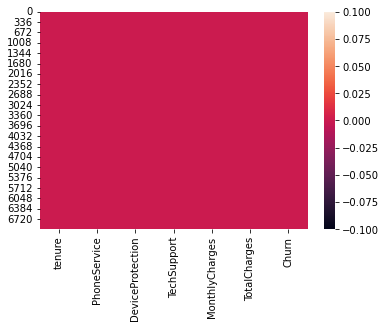

In [26]:
sns.heatmap(df.isnull())
plt.show()

In [27]:
df.isnull().sum().sum()

0

Therefore there are no null values  presented in  our dataset

Label Encoder

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le=LabelEncoder()

In [30]:
df['Churn']=le.fit_transform(df['Churn'])

In [31]:
df['DeviceProtection']=le.fit_transform(df['DeviceProtection'])

In [32]:
df['PhoneService']=le.fit_transform(df['PhoneService'])

In [33]:
df['TechSupport']=le.fit_transform(df['TechSupport'])

In [34]:
df.dtypes

tenure              int32
PhoneService        int32
DeviceProtection    int32
TechSupport         int32
MonthlyCharges      int32
TotalCharges        int32
Churn               int32
dtype: object

Therefore we have successfully converted the object dtype to interger datatype

# Checking Correlation

In [35]:
df.corr()

,tenure,PhoneService,DeviceProtection,TechSupport,MonthlyCharges,TotalCharges,Churn
tenure,1.000000,0.008448,0.371105,0.322942,0.247917,0.826179,-0.352229
PhoneService,0.008448,1.000000,0.003727,-0.019158,0.247277,0.113213,0.011942
DeviceProtection,0.371105,0.003727,1.000000,0.240593,0.163623,0.387899,-0.178134
TechSupport,0.322942,-0.019158,0.240593,1.000000,-0.008639,0.275625,-0.282492
MonthlyCharges,0.247917,0.247277,0.163623,-0.008639,1.000000,0.651237,0.193422
TotalCharges,0.826179,0.113213,0.387899,0.275625,0.651237,1.000000,-0.198326
Churn,-0.352229,0.011942,-0.178134,-0.282492,0.193422,-0.198326,1.000000


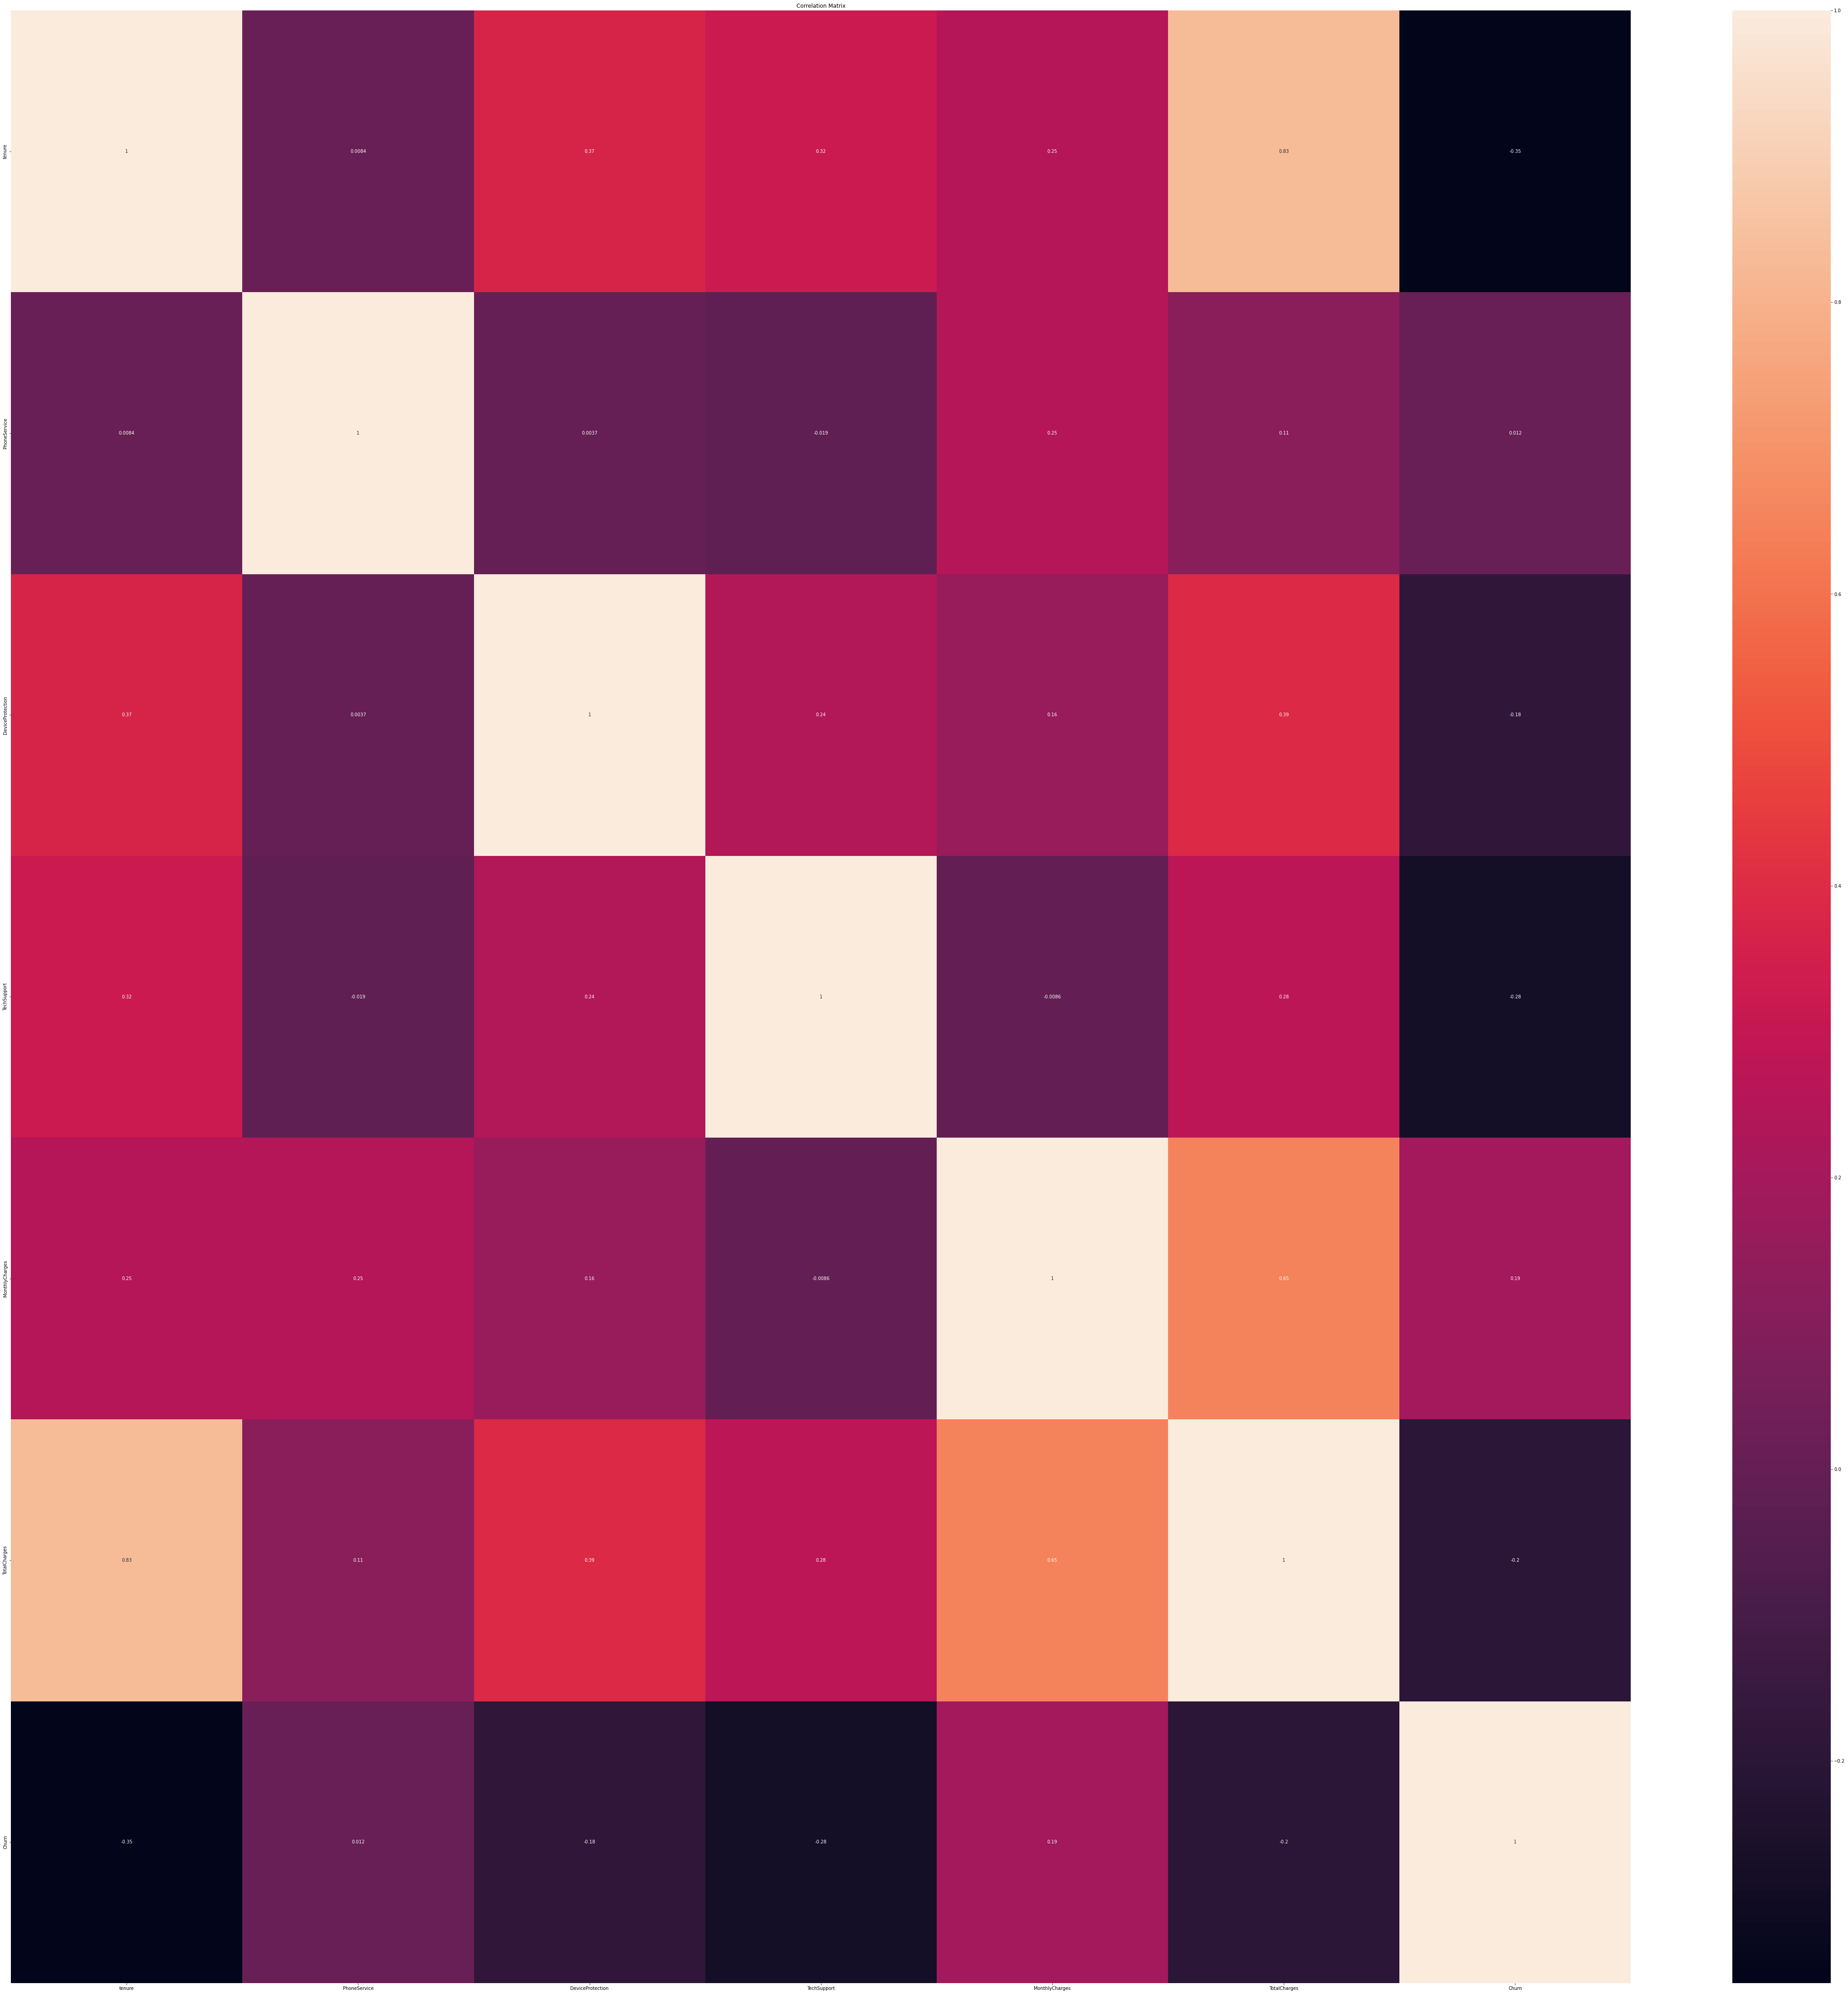

In [36]:
corr_mat=df.corr()
# Size of the canvas
plt.figure(figsize=[80,80])
# plot the correlation matrix
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.savefig('Insurance correlation_matrix.jpg')
plt.show()

Let's print the correlation values of independent variables with target variables  in target form

In [37]:
corr_matrix=df.corr()
corr_matrix

,tenure,PhoneService,DeviceProtection,TechSupport,MonthlyCharges,TotalCharges,Churn
tenure,1.000000,0.008448,0.371105,0.322942,0.247917,0.826179,-0.352229
PhoneService,0.008448,1.000000,0.003727,-0.019158,0.247277,0.113213,0.011942
DeviceProtection,0.371105,0.003727,1.000000,0.240593,0.163623,0.387899,-0.178134
TechSupport,0.322942,-0.019158,0.240593,1.000000,-0.008639,0.275625,-0.282492
MonthlyCharges,0.247917,0.247277,0.163623,-0.008639,1.000000,0.651237,0.193422
TotalCharges,0.826179,0.113213,0.387899,0.275625,0.651237,1.000000,-0.198326
Churn,-0.352229,0.011942,-0.178134,-0.282492,0.193422,-0.198326,1.000000


In [38]:
type(corr_matrix)

pandas.core.frame.DataFrame

In [39]:
corr_matrix=df.corr()
corr_matrix['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193422
PhoneService        0.011942
DeviceProtection   -0.178134
TotalCharges       -0.198326
TechSupport        -0.282492
tenure             -0.352229
Name: Churn, dtype: float64

Therefore we can clearly see that there is a strong positive correlation between MonthlyChargers and 
Churn also  weak positive correlation between PhoneService and Churn.Strong negative correlation 
between DeviceProtection and Churn also weak negative correlation between tenure and churn

# Checking Outliers

Splitting independent and dependent variables in x and y

In [40]:
x=df.drop('Churn',axis=1)
y=df['Churn']

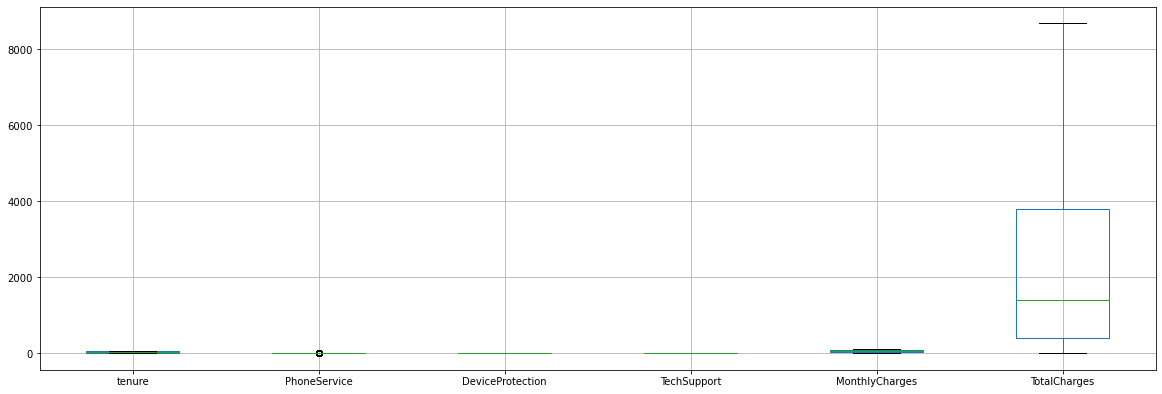

In [41]:
# Plotting boxplot for  the columns
x.iloc[:,0:7].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

Only one column has outliers we shall remove using the following techniques

We shall check for skewness

In [42]:
x.skew().sort_values(ascending=False)

TotalCharges        0.963229
TechSupport         0.402365
tenure              0.239540
DeviceProtection    0.186847
MonthlyCharges     -0.220162
PhoneService       -2.727153
dtype: float64

WE can skewness in multiple columns we will remove skewness using Power_transform method

In [43]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

In [44]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

3    0.139751
2    0.001051
5   -0.146651
0   -0.243325
4   -0.261109
1   -2.727153
dtype: float64

In [45]:
type(x_new)

numpy.ndarray

In [46]:
x.columns

Index(['tenure', 'PhoneService', 'DeviceProtection', 'TechSupport',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [47]:
x=pd.DataFrame(x_new,columns=x.columns)

In [48]:
x

,tenure,PhoneService,DeviceProtection,TechSupport,MonthlyCharges,TotalCharges
0,-1.644343,-3.054010,-1.077012,-0.983227,-1.171666,-1.797817
1,0.297205,0.327438,1.163539,-0.983227,-0.254278,0.254751
2,-1.495444,0.327438,-1.077012,-0.983227,-0.354173,-1.373711
3,0.646327,-3.054010,1.163539,1.252625,-0.724353,0.233647
4,-1.495444,0.327438,-1.077012,-0.983227,0.206871,-1.239549
...,...,...,...,...,...,...
7038,-0.078084,0.327438,1.163539,1.252625,0.661003,0.297003
7039,1.342198,0.327438,1.163539,-0.983227,1.268276,1.567754
7040,-0.725121,-3.054010,-1.077012,-0.983227,-1.171666,-0.852308
7041,-1.265130,0.327438,-1.077012,-0.983227,0.337275,-0.915099


In [49]:
x.skew().sort_values(ascending=False)

TechSupport         0.139751
DeviceProtection    0.001051
TotalCharges       -0.146651
tenure             -0.243325
MonthlyCharges     -0.261109
PhoneService       -2.727153
dtype: float64

In [50]:
sk=x.skew()

In [51]:
sk

tenure             -0.243325
PhoneService       -2.727153
DeviceProtection    0.001051
TechSupport         0.139751
MonthlyCharges     -0.261109
TotalCharges       -0.146651
dtype: float64

In [52]:
sk[np.abs(sk)>0.5].all()

True

In [53]:
sk[np.abs(sk)>0.5]

PhoneService   -2.727153
dtype: float64

In [54]:
x.skew()[np.abs(x.skew())<0.25].all()

True

Remove Outliers

In [55]:
feature=['tenure', 'PhoneService', 'DeviceProtection', 'TechSupport',
       'MonthlyCharges', 'TotalCharges','Churn']

In [56]:
def outliers(df,ft):
    q1=df[ft].quantile(0.25)
    q3=df[ft].quantile(0.75)
    iqr=q3-q1
    lower_limit=q1-1.5*iqr
    upper_limit=q3+1.5*iqr
    ls=df.index[(df[ft]<lower_limit) | (df[ft]>upper_limit)]
    return ls

In [57]:
index_list=[]
for i in feature:
    index_list.extend(outliers(df,i))

In [58]:
index_list

[0,
 3,
 7,
 20,
 27,
 62,
 81,
 89,
 103,
 105,
 107,
 114,
 116,
 129,
 131,
 133,
 168,
 180,
 185,
 187,
 206,
 211,
 215,
 216,
 217,
 225,
 236,
 252,
 255,
 259,
 260,
 263,
 272,
 278,
 303,
 321,
 324,
 328,
 348,
 354,
 358,
 372,
 376,
 382,
 387,
 398,
 424,
 431,
 435,
 452,
 465,
 481,
 488,
 495,
 498,
 544,
 569,
 596,
 610,
 616,
 620,
 634,
 660,
 667,
 669,
 674,
 677,
 688,
 716,
 718,
 735,
 765,
 776,
 784,
 790,
 794,
 813,
 829,
 843,
 847,
 859,
 866,
 873,
 875,
 877,
 884,
 893,
 917,
 934,
 941,
 943,
 960,
 973,
 1011,
 1018,
 1037,
 1050,
 1051,
 1053,
 1072,
 1110,
 1119,
 1122,
 1144,
 1146,
 1150,
 1161,
 1169,
 1182,
 1204,
 1221,
 1225,
 1242,
 1255,
 1257,
 1271,
 1278,
 1298,
 1311,
 1326,
 1331,
 1333,
 1334,
 1340,
 1349,
 1352,
 1365,
 1379,
 1402,
 1407,
 1416,
 1452,
 1479,
 1480,
 1481,
 1500,
 1506,
 1513,
 1519,
 1560,
 1562,
 1581,
 1584,
 1614,
 1620,
 1634,
 1637,
 1652,
 1689,
 1692,
 1694,
 1703,
 1722,
 1734,
 1789,
 1802,
 1803,
 1819

In [59]:
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [60]:
df_cleaned=remove(df,index_list)

In [61]:
df_cleaned.shape

(6361, 7)

Let's Quantify

In [62]:
from scipy.stats import zscore

In [63]:
(np.abs(zscore(x))<3).all()

tenure               True
PhoneService        False
DeviceProtection     True
TechSupport          True
MonthlyCharges       True
TotalCharges         True
dtype: bool

Therefore most of the outliers have been removed now we can proceed with further steps

In [64]:
x=df_cleaned.drop('Churn',axis=1)
y=df_cleaned['Churn']

In [65]:
x

,tenure,PhoneService,DeviceProtection,TechSupport,MonthlyCharges,TotalCharges
1,34,1,2,0,56,1889
2,2,1,0,0,53,108
4,2,1,0,0,70,151
5,8,1,2,0,99,820
6,22,1,0,0,89,1949
...,...,...,...,...,...,...
7037,72,1,1,1,21,1419
7038,24,1,2,2,84,1990
7039,72,1,2,0,103,7362
7041,4,1,0,0,74,306


In [66]:
y

1       0
2       1
4       1
5       1
6       0
       ..
7037    0
7038    0
7039    0
7041    1
7042    0
Name: Churn, Length: 6361, dtype: int32

# Training process begin

In [67]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

Finding best random state

In [68]:
maxaccu=0
maxrs=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    le=LogisticRegression()
    le.fit(x_train,y_train)
    y_pred=le.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    print('Accuracy',acc,'random_state',i)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
        print('accuracy',maxaccu,'random_state',i)

Accuracy 0.786331500392773 random_state 1
accuracy 0.786331500392773 random_state 1
Accuracy 0.7855459544383346 random_state 2
Accuracy 0.7918303220738413 random_state 3
accuracy 0.7918303220738413 random_state 3
Accuracy 0.7949725058915946 random_state 4
accuracy 0.7949725058915946 random_state 4
Accuracy 0.7902592301649647 random_state 5
Accuracy 0.7910447761194029 random_state 6
Accuracy 0.7714061272584446 random_state 7
Accuracy 0.7973291437549097 random_state 8
accuracy 0.7973291437549097 random_state 8
Accuracy 0.7973291437549097 random_state 9
Accuracy 0.8020424194815396 random_state 10
accuracy 0.8020424194815396 random_state 10
Accuracy 0.798114689709348 random_state 11
Accuracy 0.802827965435978 random_state 12
accuracy 0.802827965435978 random_state 12
Accuracy 0.7894736842105263 random_state 13
Accuracy 0.816967792615868 random_state 14
accuracy 0.816967792615868 random_state 14
Accuracy 0.8106834249803614 random_state 15
Accuracy 0.7879025923016496 random_state 16
Accuracy

Accuracy 0.795758051846033 random_state 180
Accuracy 0.7949725058915946 random_state 181
Accuracy 0.798114689709348 random_state 182
Accuracy 0.8036135113904164 random_state 183
Accuracy 0.7918303220738413 random_state 184
Accuracy 0.7753338570306363 random_state 185
Accuracy 0.793401413982718 random_state 186
Accuracy 0.8075412411626081 random_state 187
Accuracy 0.7949725058915946 random_state 188
Accuracy 0.7965435978004713 random_state 189
Accuracy 0.805184603299293 random_state 190
Accuracy 0.7902592301649647 random_state 191
Accuracy 0.793401413982718 random_state 192
Accuracy 0.8012568735271013 random_state 193
Accuracy 0.776904948939513 random_state 194
Accuracy 0.7753338570306363 random_state 195
Accuracy 0.798114689709348 random_state 196
Accuracy 0.800471327572663 random_state 197
Accuracy 0.7871170463472114 random_state 198
Accuracy 0.8036135113904164 random_state 199
Accuracy 0.8067556952081697 random_state 200
Accuracy 0.7831893165750197 random_state 201
Accuracy 0.8083267

Accuracy 0.7808326787117046 random_state 364
Accuracy 0.7847604084838963 random_state 365
Accuracy 0.8012568735271013 random_state 366
Accuracy 0.8138256087981147 random_state 367
Accuracy 0.7973291437549097 random_state 368
Accuracy 0.7894736842105263 random_state 369
Accuracy 0.7949725058915946 random_state 370
Accuracy 0.786331500392773 random_state 371
Accuracy 0.7973291437549097 random_state 372
Accuracy 0.8138256087981147 random_state 373
Accuracy 0.781618224666143 random_state 374
Accuracy 0.788688138256088 random_state 375
Accuracy 0.798114689709348 random_state 376
Accuracy 0.7926158680282797 random_state 377
Accuracy 0.8012568735271013 random_state 378
Accuracy 0.7926158680282797 random_state 379
Accuracy 0.788688138256088 random_state 380
Accuracy 0.7965435978004713 random_state 381
Accuracy 0.7973291437549097 random_state 382
Accuracy 0.8012568735271013 random_state 383
Accuracy 0.800471327572663 random_state 384
Accuracy 0.8083267871170463 random_state 385
Accuracy 0.79183

Accuracy 0.786331500392773 random_state 548
Accuracy 0.7902592301649647 random_state 549
Accuracy 0.7910447761194029 random_state 550
Accuracy 0.793401413982718 random_state 551
Accuracy 0.7973291437549097 random_state 552
Accuracy 0.7737627651217597 random_state 553
Accuracy 0.786331500392773 random_state 554
Accuracy 0.795758051846033 random_state 555
Accuracy 0.8075412411626081 random_state 556
Accuracy 0.8279654359780048 random_state 557
Accuracy 0.7949725058915946 random_state 558
Accuracy 0.7965435978004713 random_state 559
Accuracy 0.8012568735271013 random_state 560
Accuracy 0.7784760408483896 random_state 561
Accuracy 0.7879025923016496 random_state 562
Accuracy 0.793401413982718 random_state 563
Accuracy 0.795758051846033 random_state 564
Accuracy 0.7753338570306363 random_state 565
Accuracy 0.7894736842105263 random_state 566
Accuracy 0.783974862529458 random_state 567
Accuracy 0.7871170463472114 random_state 568
Accuracy 0.7965435978004713 random_state 569
Accuracy 0.813040

Accuracy 0.8020424194815396 random_state 731
Accuracy 0.7918303220738413 random_state 732
Accuracy 0.8146111547525531 random_state 733
Accuracy 0.7879025923016496 random_state 734
Accuracy 0.793401413982718 random_state 735
Accuracy 0.798114689709348 random_state 736
Accuracy 0.7831893165750197 random_state 737
Accuracy 0.800471327572663 random_state 738
Accuracy 0.786331500392773 random_state 739
Accuracy 0.7926158680282797 random_state 740
Accuracy 0.7879025923016496 random_state 741
Accuracy 0.7745483110761979 random_state 742
Accuracy 0.798114689709348 random_state 743
Accuracy 0.8075412411626081 random_state 744
Accuracy 0.7996857816182247 random_state 745
Accuracy 0.7918303220738413 random_state 746
Accuracy 0.7871170463472114 random_state 747
Accuracy 0.7894736842105263 random_state 748
Accuracy 0.7831893165750197 random_state 749
Accuracy 0.7855459544383346 random_state 750
Accuracy 0.793401413982718 random_state 751
Accuracy 0.7871170463472114 random_state 752
Accuracy 0.76826

Accuracy 0.8043990573448547 random_state 916
Accuracy 0.8067556952081697 random_state 917
Accuracy 0.788688138256088 random_state 918
Accuracy 0.7989002356637863 random_state 919
Accuracy 0.786331500392773 random_state 920
Accuracy 0.7973291437549097 random_state 921
Accuracy 0.781618224666143 random_state 922
Accuracy 0.8075412411626081 random_state 923
Accuracy 0.7808326787117046 random_state 924
Accuracy 0.793401413982718 random_state 925
Accuracy 0.800471327572663 random_state 926
Accuracy 0.7910447761194029 random_state 927
Accuracy 0.7824037706205813 random_state 928
Accuracy 0.7871170463472114 random_state 929
Accuracy 0.8091123330714847 random_state 930
Accuracy 0.7847604084838963 random_state 931
Accuracy 0.7965435978004713 random_state 932
Accuracy 0.7926158680282797 random_state 933
Accuracy 0.8083267871170463 random_state 934
Accuracy 0.786331500392773 random_state 935
Accuracy 0.7824037706205813 random_state 936
Accuracy 0.800471327572663 random_state 937
Accuracy 0.787902

KeyboardInterrupt: 

In [69]:
print('Best Accuracy is',maxaccu,'on random state',maxrs)

Best Accuracy is 0.8303220738413197 on random state 659


We have found that best random state value as 41.We will create train_test_split using this random_state

Creating train_test_split

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=659)

In [71]:
x_train

,tenure,PhoneService,DeviceProtection,TechSupport,MonthlyCharges,TotalCharges
3641,49,1,2,2,74,3721
6869,45,1,0,2,54,2319
83,42,1,2,2,103,4327
3380,1,1,0,0,95,95
1790,12,1,0,0,78,947
...,...,...,...,...,...,...
228,30,1,0,2,89,2723
6874,31,1,0,2,49,1498
2775,53,1,0,2,60,3229
552,55,1,1,1,19,1153


In [72]:
y_train

3641    0
6869    1
83      0
3380    1
1790    1
       ..
228     0
6874    0
2775    1
552     0
4095    0
Name: Churn, Length: 5088, dtype: int32

In [73]:
x_test

,tenure,PhoneService,DeviceProtection,TechSupport,MonthlyCharges,TotalCharges
655,10,1,0,2,95,865
2977,1,1,1,1,19,19
2831,12,1,2,0,98,1060
1715,46,1,1,1,19,967
4153,27,1,1,1,20,595
...,...,...,...,...,...,...
6014,54,1,2,0,94,5060
5436,1,1,0,2,54,54
7005,23,1,1,1,19,486
1100,15,1,1,1,24,324


In [74]:
y_test

655     0
2977    0
2831    1
1715    0
4153    0
       ..
6014    0
5436    0
7005    0
1100    0
5532    0
Name: Churn, Length: 1273, dtype: int32

# Model Evaluation

# 1. Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 83.03220738413198
[[878  77]
 [139 179]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       955
           1       0.70      0.56      0.62       318

    accuracy                           0.83      1273
   macro avg       0.78      0.74      0.76      1273
weighted avg       0.82      0.83      0.82      1273



# 2. Decision Tree Classifier Model

In [76]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred2=dt.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred2)*100)
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

Accuracy 74.54831107619796
[[793 162]
 [162 156]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       955
           1       0.49      0.49      0.49       318

    accuracy                           0.75      1273
   macro avg       0.66      0.66      0.66      1273
weighted avg       0.75      0.75      0.75      1273



# 3. Random Forest Classifier Model

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred3=rf.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred3)*100)
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

Accuracy 78.08326787117046
[[838 117]
 [162 156]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       955
           1       0.57      0.49      0.53       318

    accuracy                           0.78      1273
   macro avg       0.70      0.68      0.69      1273
weighted avg       0.77      0.78      0.78      1273



# 4. Support Vector Classifier Model

In [79]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred4=svc.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred4)*100)
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

Accuracy 75.01963864886095
[[955   0]
 [318   0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       955
           1       0.00      0.00      0.00       318

    accuracy                           0.75      1273
   macro avg       0.38      0.50      0.43      1273
weighted avg       0.56      0.75      0.64      1273



# 5. AdaBoost Classifier Model

In [80]:
 from sklearn.ensemble import AdaBoostClassifier

In [81]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
y_pred5=ad.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred5)*100)
print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

Accuracy 82.95365278868813
[[886  69]
 [148 170]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       955
           1       0.71      0.53      0.61       318

    accuracy                           0.83      1273
   macro avg       0.78      0.73      0.75      1273
weighted avg       0.82      0.83      0.82      1273



# 6. Gradient Boosting Classifier Model

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred6=gb.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred6)*100)
print(confusion_matrix(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

Accuracy 82.79654359780048
[[885  70]
 [149 169]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       955
           1       0.71      0.53      0.61       318

    accuracy                           0.83      1273
   macro avg       0.78      0.73      0.75      1273
weighted avg       0.82      0.83      0.82      1273



Among these 6 models Logistic Regression, GradientBoosting and AdaBoosting model is performing well
with an accuracy  of 83 percentage